In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

/Users/thanasi/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import os
import fnmatch
import numpy as np
import pandas as pd
import scipy as sp
import palettable as pbl
import h5py

In [4]:
from isanaht import plot_helper as ph

In [5]:
cmap7 = pbl.colorbrewer.get_map('Set1', 'Qualitative', 7)
cmap11 = pbl.colorbrewer.get_map('Paired', 'Qualitative', 12)
c11s = cmap11.hex_colors
c11s = c11s[1::2] + c11s[::2] # unpair them

In [6]:
mpl.rc('image', cmap='coolwarm', interpolation='nearest')
mpl.rc('font', family='STIXGeneral')
mpl.rc('legend', fancybox=False, numpoints=1, markerscale=1.5, borderaxespad=0.5, fontsize=16)
mpl.rc('figure', figsize=(8,8))
mpl.rc('axes', linewidth=1.5, edgecolor='k', labelsize=22, grid=False, axisbelow=True,
        prop_cycle= mpl.cycler(color=c11s))
mpl.rc('grid', linewidth=1)
mpl.rc('ytick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('lines', linewidth=2)

---

In [57]:
eps_lo = 1
eps_hi = 12
omega0 = 0.4
lmbda0 = 2*np.pi / omega0
lmbda_hi = lmbda0 / eps_hi

sx = 16
sy = 8

In [58]:
print(lmbda_hi)

1.3089969389957472


---


In [59]:
X_max = sx // 2
X_min = - X_max
Y_max = sy //2
Y_min =  - Y_max


with h5py.File('./out/straight-waveguide-eps-000000.00.h5', 'r') as eps_file:
    epsilon = eps_file["eps"].value.T
    nX = epsilon.shape[1]
    X = np.mgrid[-X_max:X_max:1j*nX]

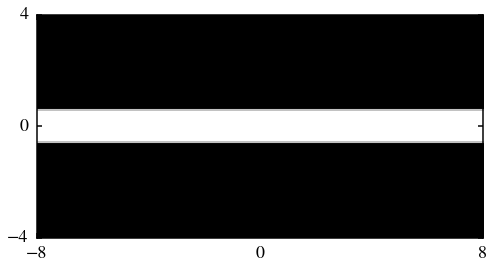

In [60]:
fig,ax = plt.subplots()
ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), cmap=plt.cm.gray);
ax.set_aspect('equal');
ax.set_xticks([X_min, 0, X_max]);
ax.set_yticks([Y_min, 0, Y_max]);

In [61]:
files = os.listdir("./out/")
files = fnmatch.filter(files, "*-hz-*.h5")

In [62]:
hz_min = 0
hz_max = 0

In [63]:
for fn in files:
    timestamp = fn.split("-")[-1][:-3]
    with h5py.File('./out/' + fn, 'r') as field_data:
        hz = field_data["hz"].value.T
        hz_min = min(hz_min, hz.min())
        hz_max = max(hz_max, hz.max())

In [64]:
hz_lim = max(abs(hz_min), abs(hz_max))
print(hz_lim)

11.4739931405


In [54]:
fig,ax = plt.subplots(frameon=False)
ax.contour(epsilon, [5], colors='k', extent=(X_min, X_max, Y_min, Y_max))
axim = ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), vmin=-hz_lim, vmax=hz_lim, cmap=plt.cm.RdBu);
ax.set_aspect('equal');
ax.xaxis.set_visible(False);
ax.yaxis.set_visible(False);
ax.axis('off');
fig.tight_layout()

ns = 1
for fn in files[::ns]:
    timestamp = fn.split("-")[-1][:-3]
    with h5py.File('./out/' + fn, 'r') as field_data:
        hz = field_data["hz"].value.T
        axim.set_data(hz)
        fig.savefig("./out/png/hz-%s.png" % timestamp, bbox_inches='tight', pad_inches=0)

        
plt.close(fig)

In [55]:
!cd out/png/ && convert ./*.png hz-out.gif && cd ../..

In [65]:
fluxes = pd.read_csv('./out/straight-waveguide.fluxes.out',
                     header=None, index_col=0, usecols=[1,2,3,4,5],
                     names=["freq", "top", "right","bottom","left"])

In [66]:
# fluxes

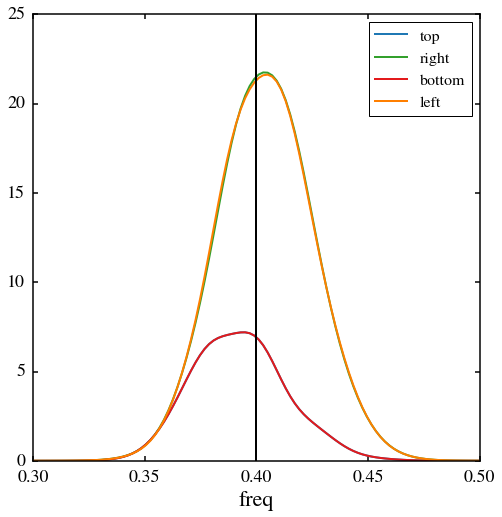

In [73]:
flx2 = np.abs(fluxes)
fig,ax = plt.subplots()
# ax.plot(fluxes, 'o-');
# ax.set_ylim(0,None);
# ax.axhline(0.25, ls='--', c='k');
flx2.plot(ax = ax)
ax.axvline(omega0, c='k')

In [69]:
ratio = (flx2["top"] + flx2["bottom"]) / (flx2.sum(axis=1))
# ratio.loc[np.isclose(flx2.sum(axis=1), 0, atol=1e-3)] = np.nan

In [70]:
# flx2.sum(axis=1)

0.350505050505


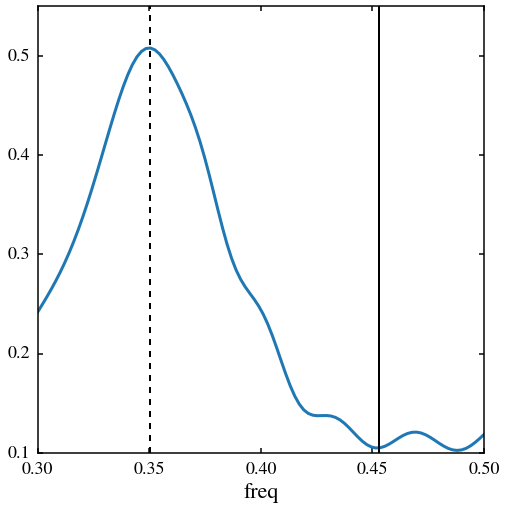

In [71]:
fig,ax = plt.subplots();
ratio.plot(ax=ax, lw=3);
omega1 = flx2.index[np.argmax(ratio.values)]
ax.axvline(omega1, c='k', ls='--',zorder=-3 );
ax.axvline(0.4528543062578309, c='k')
print(omega1)